Predicting Profitability of Sales Orders Using Machine Learning

Project Overview:
Business Question: Predict the Profitability based on inputs: Price, Discount, Shipping Cost, Quantity
ML Task:	Regression (predict profit as a real number, not 0 or 1)



1. Import Libraries
2. Load Dataset
3. Select Features and Target
4. One-Hot Encode Categorical Features
5. Split the Data
6. Train Random Forest Model
7. Show Feature Importances

Step 1: Import Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

Step 2: Load the Dataset

In [7]:
# Reading data from a CSV file
data = pd.read_csv('dataset.csv', encoding='latin1')


In [8]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [29]:
# Transform Categorical Features-

# List of categorical features to encode
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)


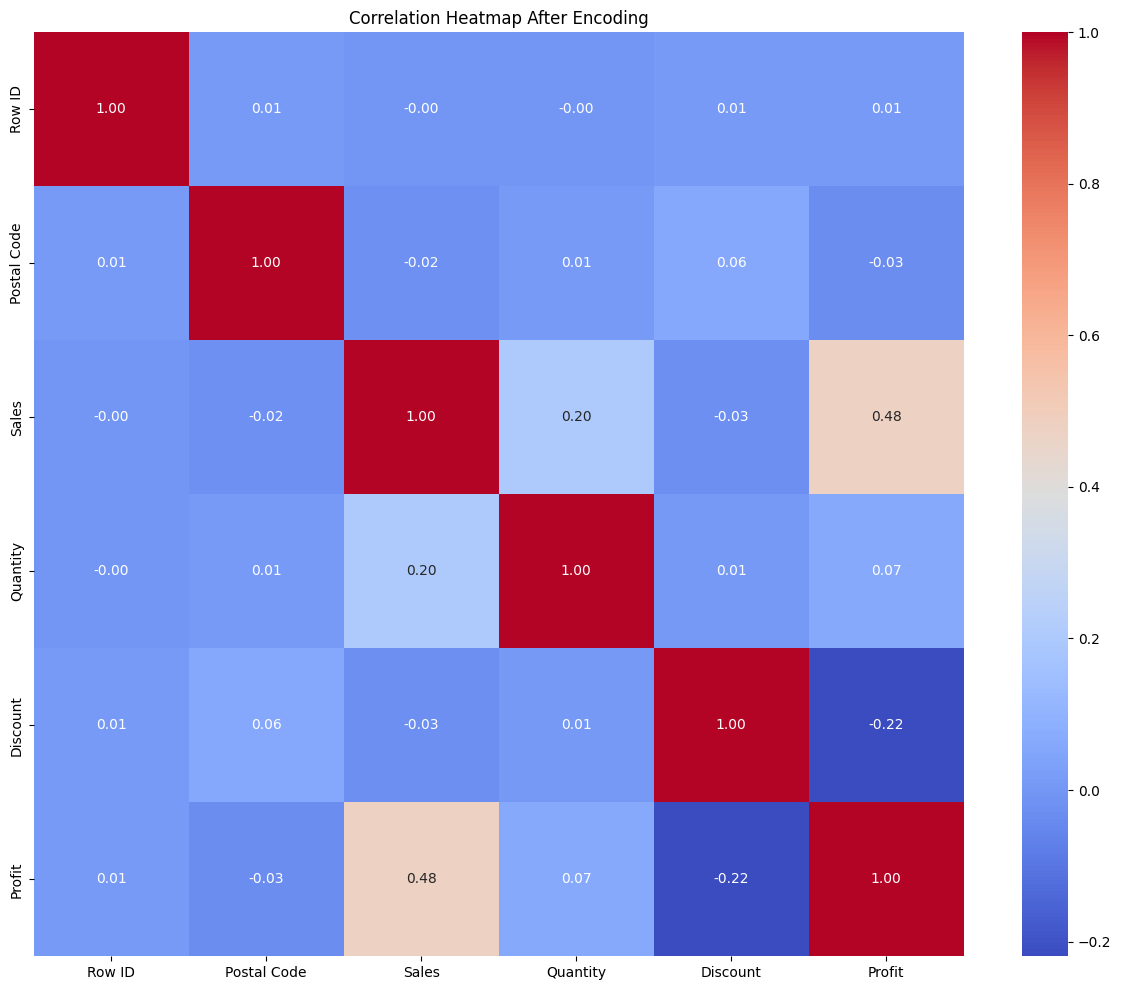

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data_encoded.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap After Encoding')
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder

# Copy the data to avoid damaging original
data_exploration = data.copy()

# List of categorical features
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']


# Apply Label Encoding temporarily
le = LabelEncoder()
for col in categorical_features:
    data_exploration[col] = le.fit_transform(data_exploration[col])


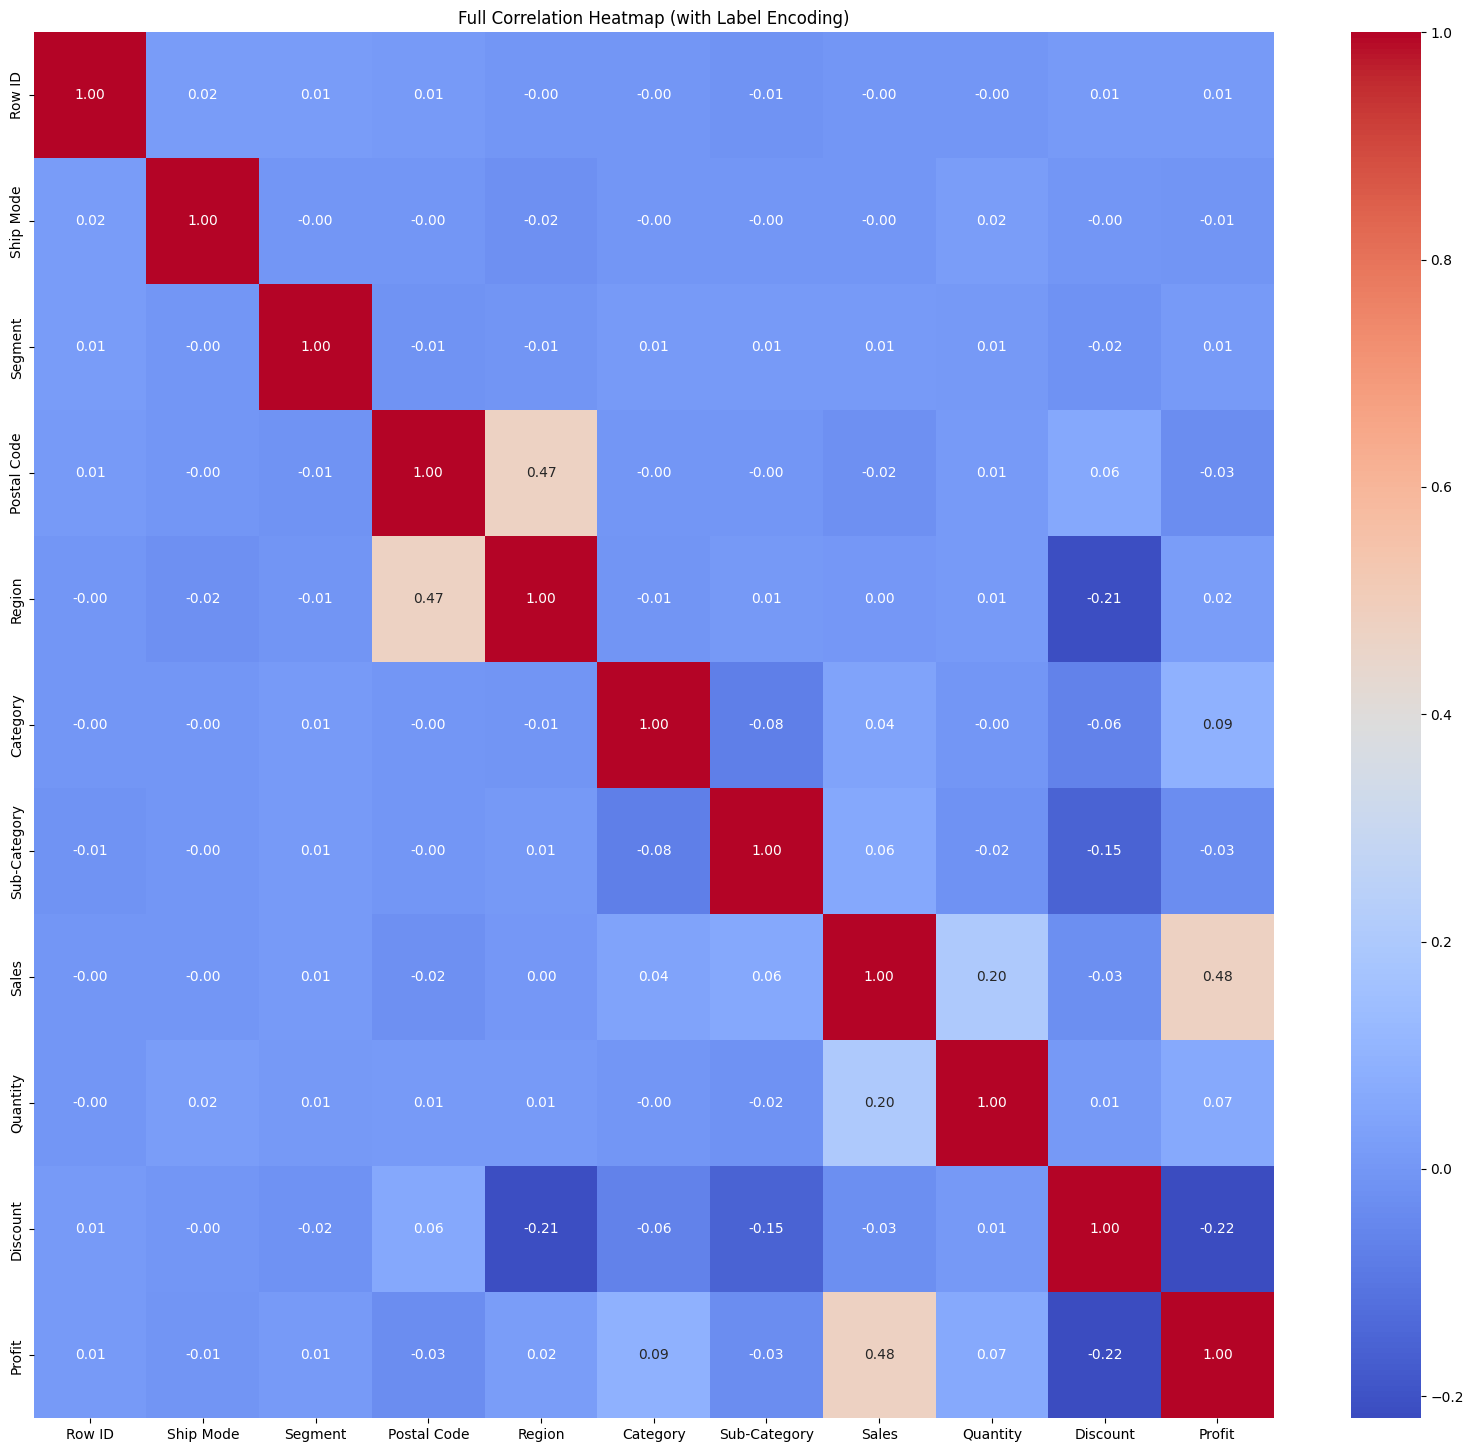

In [32]:
numeric_data = data_exploration.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Full Correlation Heatmap (with Label Encoding)')
plt.show()


In [33]:
# Step 5: Show Correlation with Profit Only

# Get correlation of all features with 'Profit'
profit_corr = corr_matrix['Profit'].sort_values(ascending=False)

# Print it nicely
print("\n🔍 Correlations with Profit (sorted):")
print(profit_corr)



🔍 Correlations with Profit (sorted):
Profit          1.000000
Sales           0.479064
Category        0.091506
Quantity        0.066253
Region          0.022216
Segment         0.013355
Row ID          0.012497
Ship Mode      -0.006619
Sub-Category   -0.029503
Postal Code    -0.029961
Discount       -0.219487
Name: Profit, dtype: float64


Features I should use: 'Sales', 'Discount', 'Quantity', 'Category', 'Ship Mode', 'Region'

In [35]:
# Select Features and Target


# Final list of features
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Ship Mode', 'Region']

# Target variable
target = 'Profit'

# Check if all required columns exist
if not all(col in data.columns for col in features + [target]):
    raise ValueError("Error: Some required columns are missing from the dataset. Please check your CSV file.")

# Select input features (X) and target (y)
X = data[features]
y = data[target]

In [36]:
# One-Hot Encode Categorical Features

categorical_features = ['Category', 'Ship Mode', 'Region']

# Apply One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)


Train Random Forest Model

In [37]:
# Split the Data


from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest Model


from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [38]:
# Show Feature Importances
# ------------------------------------------

import pandas as pd

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to map feature names to importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance descending
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Show the importance
print("\n🔍 Feature Importances (sorted):")
print(importance_df)



🔍 Feature Importances (sorted):
                     Feature  Importance
0                      Sales    0.769298
1                   Discount    0.166606
2                   Quantity    0.023337
3   Category_Office Supplies    0.008897
4        Category_Technology    0.008456
10               Region_West    0.005299
7   Ship Mode_Standard Class    0.005001
8                Region_East    0.004469
9               Region_South    0.004279
6     Ship Mode_Second Class    0.003583
5         Ship Mode_Same Day    0.000775


Key insights:

✅ Sales is by far the most important feature (76.9%) — no surprise!

✅ Discount is the second most important (16.6%) — very logical (discounts reduce profit).

✅ Quantity is helpful, but not very strong (2.3%).


✅ Ship Mode, Region, Category — very small importance individually.

(but when combined, maybe they help a little.)